# Breast Cancer

In [1]:
import numpy as np
import matplotlib.pyplot as plt # for plotting 
import seaborn as sns # for plotting
from sklearn import datasets
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import model_selection as ms

In [3]:
cancer_data = datasets.load_breast_cancer()
y = cancer_data.target # Training labels ('malignant = 0', 'benign = 1')
X = cancer_data.data # 30 attributes; https://scikit-learn.org/stable/datasets/index.html#breast-cancer-dataset
X = preprocessing.scale(X) # scale each data attribute to zero-mean and unit variance 
X.shape

(569, 30)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


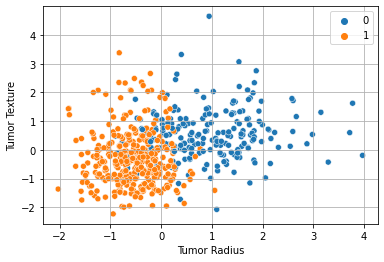

In [5]:
# Plot the first 2 attributes of training points
sns.scatterplot(X[:, 0], X[:, 1], hue=y)
plt.xlabel('Tumor Radius')
plt.ylabel('Tumor Texture')
plt.grid(True)
plt.show()

In [6]:
alpha = np.arange(1e-15,1,0.005) # Range of hyperparameter values 1E-15 to 1 by 0.005
val_scores = np.zeros((len(alpha),1)) # Initialize validation score for each alpha value

for i in range(len(alpha)): # for each alpha value
    # Set up SVM with hinge loss and l2 norm regularization
    model = linear_model.SGDClassifier(loss='hinge', penalty='l2', alpha=alpha[i])
    # Calculate cross validation scores for 5-fold cross-validation
    score = ms.cross_val_score(model, X, y, cv=5)
    val_scores[i] = score.mean() # Calculate mean of the 5 scores


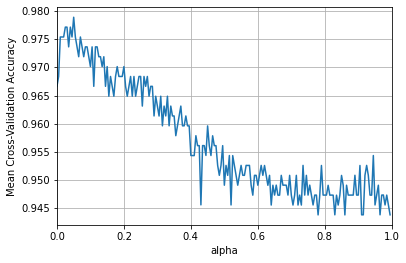

In [7]:
# Plot how cross-validation score changes with alpha
plt.plot(alpha,val_scores)
plt.xlim(0,1)
plt.xlabel('alpha')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.grid(True)
plt.show()

alpha_star = 0.050000000000001


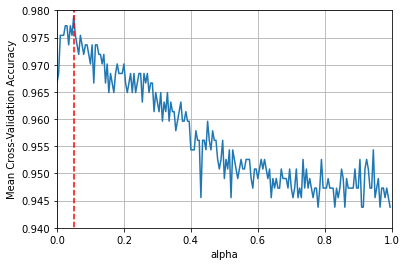

In [8]:
# Determine the alpha that maximizes the cross-validation score
ind = np.argmax(val_scores)
alpha_star = alpha[ind]
print('alpha_star =', alpha_star)

plt.plot(alpha,val_scores)
plt.plot(np.ones(11)*alpha_star,np.arange(0,1.1,0.1),'--r')
plt.xlim(0,1)
plt.ylim(0.94,0.98)
plt.xlabel('alpha')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.grid(True)
plt.show()

In [9]:
# Train model with alpha_star
model_star = linear_model.SGDClassifier(loss='hinge', penalty='l2', alpha=alpha_star)
model_trained = model_star.fit(X,y)
print('Training Accuracy =', model_trained.score(X,y))
# Training Accuracy = 0.9806678383128296

Training Accuracy = 0.9824253075571178


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


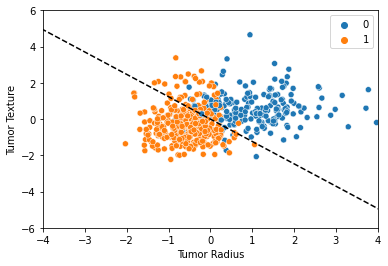

In [11]:
# Plot decision boundary of trained model
slope = model_trained.coef_[0,1]/-model_trained.coef_[0,0]
x1 = np.arange(-10,10,0.5)
y1 = slope*x1
sns.scatterplot(X[:, 0], X[:, 1], hue=y)
plt.plot(x1,y1,'--k')
plt.xlim(-4,4)
plt.ylim(-6,6)
plt.xlabel('Tumor Radius')
plt.ylabel('Tumor Texture')
plt.grid(False)
plt.show()